In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import librosa
from librosa import display as dp
from scipy.io import wavfile

In [2]:
root = '../recordings/'
files = os.listdir(root)

In [3]:
ind = 100
f = os.path.join(root, files[ind])

In [4]:
f

'../recordings/0_lucas_0.wav'

In [5]:
y, sr = librosa.load(f, sr=None)
print(f'SHAPE OF AUDIO:{y.shape}\nSAMPLE RATE: {sr}\nAUDIO DURAION: {y.shape[0] / sr}')

SHAPE OF AUDIO:(5083,)
SAMPLE RATE: 8000
AUDIO DURAION: 0.635375


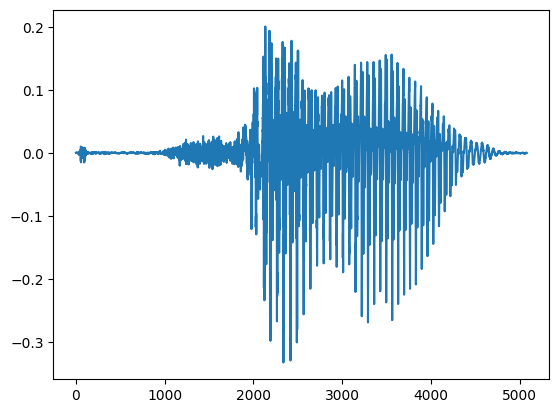

In [6]:
plt.plot(y)

### Feature extraction

#### spectrogram. STFT

In [7]:
spectrogram = np.abs(librosa.stft(y))**2

In [8]:
S_dB = librosa.power_to_db(spectrogram, ref=np.max)

In [9]:
S_dB.shape

(1025, 10)

[Text(0.5, 1.0, 'Spectrogram')]

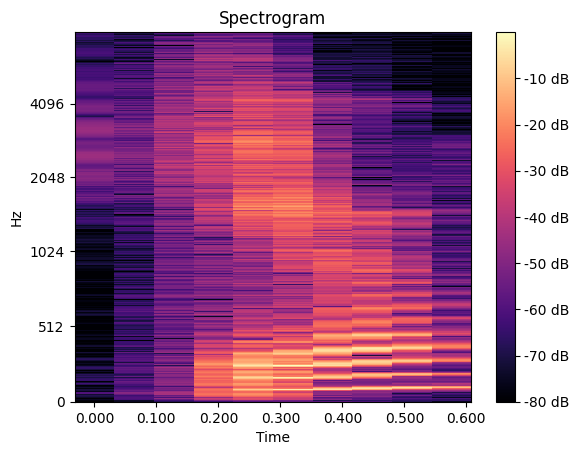

In [10]:
fig, ax = plt.subplots()
img = dp.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Spectrogram')

## Mel spectogram

In [11]:

melspectogram=librosa.feature.melspectrogram(S=spectrogram, sr=sr)

In [12]:
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)

In [13]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

C:\Users\Елдос\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

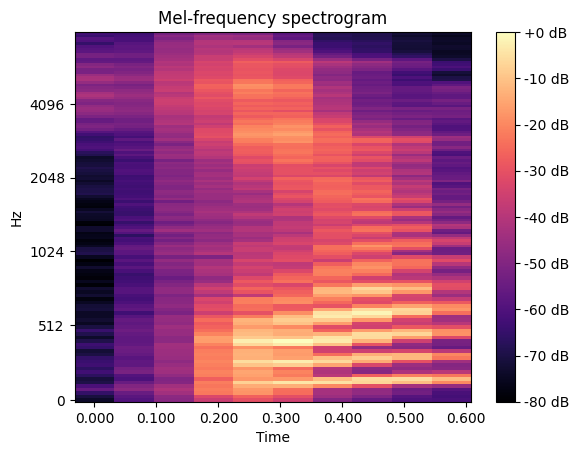

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(melspectogram, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

## mfcc

In [15]:
mfcc=librosa.feature.mfcc(y,sr=sr,n_mfcc=16)

C:\Users\Елдос\AppData\Local\Temp\ipykernel_11312\600459577.py:1: FutureWarning: Pass y=[ 3.9672852e-04  1.2207031e-04 -1.5258789e-04 ...  3.0517578e-04
  2.7465820e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc=librosa.feature.mfcc(y,sr=sr,n_mfcc=16)


In [16]:
print(f"Shape spec{spectrogram.shape}mel spec {melspectogram.shape}n\mfcc shape {mfcc.shape}")

Shape spec(1025, 10)mel spec (128, 10)n\mfcc shape (16, 10)


[Text(0.5, 1.0, 'MFCC')]

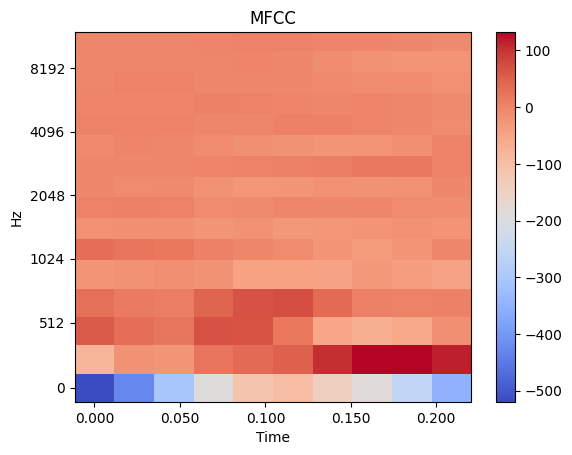

In [17]:

fig, ax = plt.subplots()

img = librosa.display.specshow(mfcc, x_axis='time',y_axis='mel', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

## Spectral_bandwidth

Spectral bandwidth: Это мера ширины спектра звука, которая может быть полезна для определения характера звука.

In [18]:

spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
spec_bw

array([[ 688.02967764, 1003.32737643,  983.88386635, 1216.65786799,
        1108.82806217,  996.19633496,  686.22525241,  540.69165241,
         521.64602672,  618.858319  ]])

In [19]:
librosa.feature.spectral_bandwidth(S=S)

array([[ 912.13154455, 2506.8193638 , 2282.65448117, 2035.09043706,
        1564.84860634, 1318.74104838,  797.7583363 ,  719.51403118,
         707.21546586,  646.97215289]])

In [20]:
freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)
librosa.feature.spectral_bandwidth(S=np.abs(D), freq=freqs)

array([[1896.37994775, 2765.51481512, 2711.83027478, 3353.39703589,
        3056.17200177, 2745.81516526, 1891.28930982, 1490.11228801,
        1437.4669391 , 1705.41002183]])

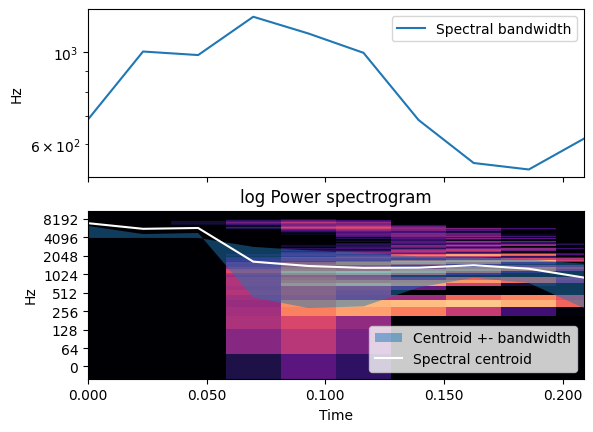

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]),
                np.minimum(centroid[0] + spec_bw[0], sr/2),
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

## Spectral_centroid

Spectral centroid: Это средневзвешенная частота звука, вычисленная на основе его спектра. Он может использоваться для определения общей высоты звука.

In [22]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
cent

array([[2573.5253225 , 2204.66824857, 2225.37692654, 1518.11458884,
        1312.37208868, 1234.81207815,  798.45356475,  673.62965409,
         623.50889619,  600.34247594]])

In [23]:
S, phase = librosa.magphase(librosa.stft(y=y))
librosa.feature.spectral_centroid(S=S)

array([[7093.27917013, 6076.61686012, 6133.69515377, 4184.3033355 ,
        3617.22556943, 3403.45079041, 2200.73763784, 1856.6917341 ,
        1718.54639511, 1654.6939493 ]])

In [24]:
freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)
librosa.feature.spectral_centroid(S=np.abs(D), freq=freqs)

array([[7093.27420113, 6076.66468073, 6133.72953696, 4184.34311675,
        3617.23519417, 3403.39278292, 2200.64018927, 1856.87770749,
        1719.22002541, 1655.60192062]])

[Text(0.5, 1.0, 'log Power spectrogram')]

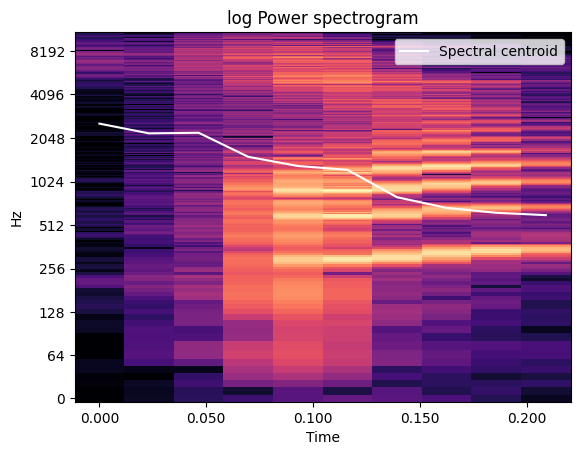

In [25]:
import matplotlib.pyplot as plt
times = librosa.times_like(cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

## spectral_contrast

Spectral contrast: Это мера контрастности между спектральными участками звука, которая может помочь определить различия в тембре звука.

In [26]:
S = np.abs(librosa.stft(y))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr,fmin=120.0,)

[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

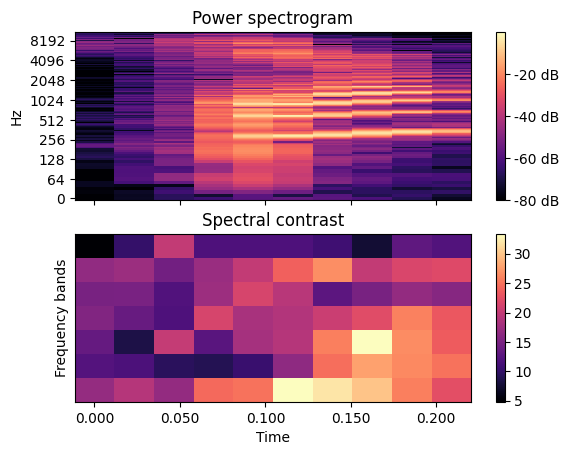

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                 ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')